In [40]:
import numpy as np
from numpy import linalg as LA
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [41]:
# van der Pol (first-order system)
# second-order form: x'' - mu * (1-x^2) * x' + x = 0
# first-order form using y = x': 
# x' = y
# y' = mu (1-x^2) * y - x
def F_vdpl(z,t,eps):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = 1/eps * ((1-x**2)) * y - x
    dzdt = [dxdt,dydt]
    return dzdt

# using Liénard transformation
def F_vdpl1(z,t,eps):
    x = z[0]
    y = z[1]
    dxdt = 1/eps * (x-x**3/3-y)
    dydt = eps * x
    dzdt = [dxdt,dydt]
    return dzdt

In [60]:
n = 2001 # number of time points
T = 30 # final time 
t = np.linspace(0,T,n) # time points
z0 = [2,-1] # initial condition (position, velocity)

# solve ODE
eps = 1
z1 = odeint(F_vdpl,z0,t,args=(eps,))
w1 = odeint(F_vdpl1,[z0[0],z0[0] - z0[0]**3/3 - z0[1]*eps],t,args=(eps,))

eps = 0.1
z2 = odeint(F_vdpl,z0,t,args=(eps,))
w2 = odeint(F_vdpl1,[z0[0],z0[0] - z0[0]**3/3 - z0[1]*eps],t,args=(eps,))

eps = 0.01
z3 = odeint(F_vdpl,z0,t,args=(eps,))
w3 = odeint(F_vdpl1,[z0[0],z0[0] - z0[0]**3/3 - z0[1]*eps],t,args=(eps,))


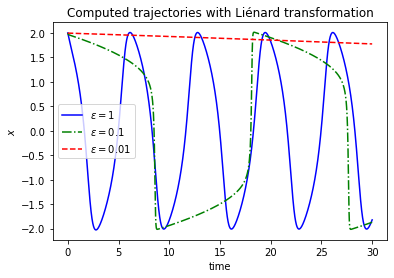

In [61]:
# plot results for x
plt.plot(t,w1[:,0],'b-',label=r'$\varepsilon=1$')
plt.plot(t,w2[:,0],'g-.',label=r'$\varepsilon=0.1$')
plt.plot(t,w3[:,0],'r--',label=r'$\varepsilon= 0.01$')
plt.ylabel(r'$x$')
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Computed trajectories with Liénard transformation')
plt.show()

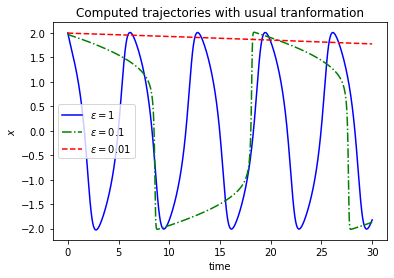

In [62]:
# plot results for x
plt.plot(t,z1[:,0],'b-',label=r'$\varepsilon=1$')
plt.plot(t,z2[:,0],'g-.',label=r'$\varepsilon=0.1$')
plt.plot(t,z3[:,0],'r--',label=r'$\varepsilon= 0.01$')
plt.ylabel(r'$x$')
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Computed trajectories with usual tranformation')
plt.show()

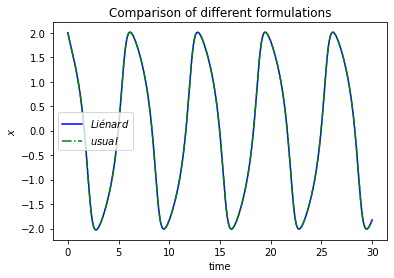

No handles with labels found to put in legend.


4.443596604009059e-07

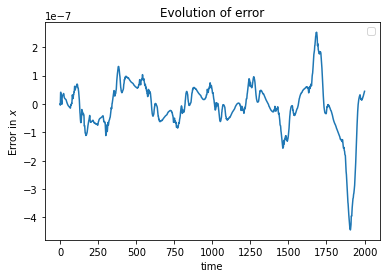

In [63]:
# plot results for x (compare w and z)
plt.plot(t,w1[:,0],'b-',label=r'$Liénard$')
plt.plot(t,z1[:,0],'g-.',label=r'$usual$')
plt.ylabel(r'$x$')
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Comparison of different formulations')
plt.show()
plt.plot(w1[:,0]-z1[:,0])
plt.ylabel('Error in ' + r'$x$')
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Evolution of error')
LA.norm(w1[:,0]-z1[:,0],np.inf)

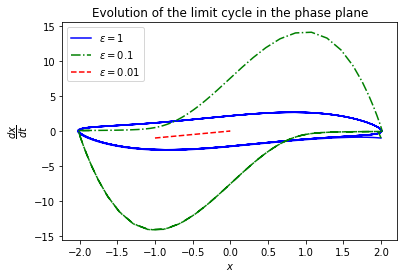

In [64]:
# plot results for x'=y
plt.plot(z1[:,0],z1[:,1],'b-',label=r'$\varepsilon=1$')
plt.plot(z2[:,0],z2[:,1],'g-.',label=r'$\varepsilon=0.1$')
plt.plot(z3[:,1],z3[:,1],'r--',label=r'$\varepsilon=0.01$')
plt.ylabel(r'$\dfrac{dx}{dt}$')
plt.xlabel(r'$x$')
plt.legend(loc='best')
plt.title('Evolution of the limit cycle in the phase plane')
plt.show()

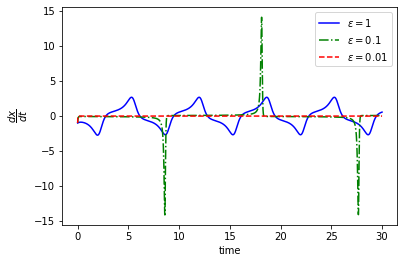

In [65]:
# plot results for x'=y
plt.plot(t,z1[:,1],'b-',label=r'$\varepsilon=1$')
plt.plot(t,z2[:,1],'g-.',label=r'$\varepsilon=0.1$')
plt.plot(t,z3[:,1],'r--',label=r'$\varepsilon=0.01$')
plt.ylabel(r'$\dfrac{dx}{dt}$')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()